In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import requests
from scipy.stats import linregress

In [102]:
#stock prices
apple_stocks = "Stock Prices/AAPL.csv"
amazon_stocks = "Stock Prices/AMZN.csv"
bankoa_stocks = "Stock Prices/BAC.csv"
verizon_stocks = "Stock Prices/VZ.csv"
exxon_stocks = "Stock Prices/XOM.csv"


#sentiments
apple_sentiments = "Sentiments/apple_sentiments_final.csv"
amazon_sentiments = "Sentiments/Amazon_sentiments_final.csv"
bankoa_sentiments = "Sentiments/BofA__sentiments_final.csv"
verizon_sentiments = "Sentiments/verizon_final.csv"
exxon_sentiments = "Sentiments/exxon_final.csv"



In [197]:
#Prep Apple data
apple_sentiments_df = pd.read_csv(apple_sentiments).drop(['Unnamed: 0'],axis=1).set_index("Date")
apple_num_articles = apple_sentiments_df.groupby('Date').count()['Sentiment']
apple_max_sent = apple_sentiments_df.groupby('Date')['Sentiment'].max()
apple_min_sent = apple_sentiments_df.groupby('Date')['Sentiment'].min()
apple_avg_sent = apple_sentiments_df.groupby('Date')['Sentiment'].mean()
apple_sum_sent = apple_sentiments_df.groupby('Date')['Sentiment'].sum()
apple_raw_stocks = pd.read_csv(apple_stocks).set_index('Date')

#Add columns to stocks data
apple_stocks_df = pd.read_csv(apple_stocks).set_index('Date')
apple_stocks_df['#articles'] = [x for x in apple_num_articles]
apple_stocks_df['max sentiment'] = [x for x in apple_max_sent]
apple_stocks_df['min sentiment'] = [x for x in apple_min_sent]
apple_stocks_df['avg sentiment'] = [x for x in apple_avg_sent]
apple_stocks_df['sum sentiment'] = [x for x in apple_sum_sent]

apple_stocks_df['Company'] = "Apple"
apple_stocks_df = apple_stocks_df.drop(['Unnamed: 0'],axis=1)

apple_df = apple_sentiments_df.join(apple_raw_stocks, on="Date",lsuffix="").drop(['Unnamed: 0'],axis=1)
apple_df

# Get number of days where sentiment and price change % are negative
apple_neg_counts = apple_df.loc[apple_df["Sentiment"]<0]
apple_neg_counts_match = apple_neg_counts.loc[apple_neg_counts["Percent Change"]< 0]
len(apple_neg_counts_match)

#Get number of days where sentiment and price change are both positive
apple_pos_counts = apple_df.loc[apple_df["Sentiment"]>0]
apple_pos_counts_match = apple_pos_counts.loc[apple_pos_counts["Percent Change"]> 0]
print(len(apple_pos_counts_match))
print(len(apple_neg_counts_match))
print(len(apple_df))
stats.pearsonr(apple_stocks_df['Percent Change'], apple_avg_sent)

388
255
1209


(0.5190671621247044, 0.019015087926683945)

In [184]:
x = list(apple_stocks_df["avg sentiment"])
y = list(apple_stocks_df["Percent Change"])
stats.ttest_ind(x,y, axis=0, equal_var=False )

Ttest_indResult(statistic=1.6870677941706294, pvalue=0.10034424475971679)

In [99]:
#Prep Amazon data
amazon_sentiments_df = pd.read_csv(amazon_sentiments)
amazon_num_articles = amazon_sentiments_df.groupby('Date').count()['Sentiment']
amazon_max_sent = amazon_sentiments_df.groupby('Date')['Sentiment'].max()
amazon_min_sent = amazon_sentiments_df.groupby('Date')['Sentiment'].min()
amazon_avg_sent = amazon_sentiments_df.groupby('Date')['Sentiment'].mean()
amazon_sum_sent = amazon_sentiments_df.groupby('Date')['Sentiment'].sum()

#Add columns to stocks data
amazon_stocks_df = pd.read_csv(amazon_stocks).set_index('Date')
amazon_stocks_df['#articles'] = [x for x in amazon_num_articles]
amazon_stocks_df['max sentiment'] = [x for x in amazon_max_sent]
amazon_stocks_df['min sentiment'] = [x for x in amazon_min_sent]
amazon_stocks_df['avg sentiment'] = [x for x in amazon_avg_sent]
amazon_stocks_df['sum sentiment'] = [x for x in amazon_sum_sent]
amazon_stocks_df['Company'] = "Amazon"
                                     
amazon_stocks_df = amazon_stocks_df.drop(['Unnamed: 0'],axis=1)
amazon_stocks_df.head()

,Percent Change,#articles,max sentiment,min sentiment,avg sentiment,sum sentiment,Company
Date,,,,,,,
2018-12-20,-2.291,100,72.642645,-81.345532,2.910099,291.009860,Amazon
2018-12-21,-5.708,100,38.978935,-26.249368,3.902253,390.225338,Amazon
2018-12-24,-2.431,100,40.282049,-43.870399,2.418167,241.816706,Amazon
2018-12-26,9.445,100,89.634645,-46.289362,2.154726,215.472603,Amazon
2018-12-27,-0.630,100,49.660622,-56.819840,-0.081374,-8.137383,Amazon


In [108]:
# #Prep BAC data
# bankoa_sentiments_df = pd.read_csv(bankoa_sentiments)
# bankoa_num_articles = bankoa_sentiments_df.groupby('Date').count()['Sentiment']
# bankoa_max_sent = bankoa_sentiments_df.groupby('Date')['Sentiment'].max()
# bankoa_min_sent = bankoa_sentiments_df.groupby('Date')['Sentiment'].min()
# bankoa_avg_sent = bankoa_sentiments_df.groupby('Date')['Sentiment'].mean()
# bankoa_sum_sent = bankoa_sentiments_df.groupby('Date')['Sentiment'].sum()

# #Add columns to stocks data
# # bankoa_stocks_df = pd.read_csv(bankoa_stocks).set_index('Date')
# # bankoa_stocks_df['#articles'] = [x for x in bankoa_num_articles]
# # bankoa_stocks_df['max sentiment'] = [x for x in bankoa_max_sent]
# # bankoa_stocks_df['min sentiment'] = [x for x in bankoa_min_sent]
# # bankoa_stocks_df['avg sentiment'] = [x for x in bankoa_avg_sent]
# # bankoa_stocks_df['sum sentiment'] = [x for x in bankoa_sum_sent]
# # bankoa_stocks_df['Company'] = "Amazon"
                                     
# # bankoa_stocks_df = bankoa_stocks_df.drop(['Unnamed: 0'],axis=1)
# # bankoa_stocks_df.head()
# len(bankoa_sentiments_df.groupby('Date').count()['Sentiment'])

16

In [109]:
#Prep Verizon data
verizon_sentiments_df = pd.read_csv(verizon_sentiments)
verizon_num_articles = verizon_sentiments_df.groupby('Date').count()['Sentiment']
verizon_max_sent = verizon_sentiments_df.groupby('Date')['Sentiment'].max()
verizon_min_sent = verizon_sentiments_df.groupby('Date')['Sentiment'].min()
verizon_avg_sent = verizon_sentiments_df.groupby('Date')['Sentiment'].mean()
verizon_sum_sent = verizon_sentiments_df.groupby('Date')['Sentiment'].sum()

#Add columns to stocks data
verizon_stocks_df = pd.read_csv(verizon_stocks).set_index('Date')
verizon_stocks_df['#articles'] = [x for x in verizon_num_articles]
verizon_stocks_df['max sentiment'] = [x for x in verizon_max_sent]
verizon_stocks_df['min sentiment'] = [x for x in verizon_min_sent]
verizon_stocks_df['avg sentiment'] = [x for x in verizon_avg_sent]
verizon_stocks_df['sum sentiment'] = [x for x in verizon_sum_sent]
verizon_stocks_df['Company'] = "Verizon"
                            
verizon_stocks_df = verizon_stocks_df.drop(['Unnamed: 0'],axis=1)
verizon_stocks_df.head()


,Percent Change,#articles,max sentiment,min sentiment,avg sentiment,sum sentiment,Company
Date,,,,,,,
2018-12-20,-1.414,32,29.627525,-9.223911,5.577858,178.491444,Verizon
2018-12-21,-0.272,26,49.655282,-33.475937,10.161961,264.210975,Verizon
2018-12-24,-3.405,16,25.593896,-1.048269,9.288928,148.622844,Verizon
2018-12-26,2.620,23,16.225718,-20.148280,0.697568,16.044067,Verizon
2018-12-27,1.304,50,34.397922,-28.108147,-1.218099,-60.904972,Verizon


In [110]:
#Prep Exxon data
exxon_sentiments_df = pd.read_csv(exxon_sentiments)
exxon_num_articles = exxon_sentiments_df.groupby('Date').count()['Sentiment']
exxon_max_sent = exxon_sentiments_df.groupby('Date')['Sentiment'].max()
exxon_min_sent = exxon_sentiments_df.groupby('Date')['Sentiment'].min()
exxon_avg_sent = exxon_sentiments_df.groupby('Date')['Sentiment'].mean()
exxon_sum_sent = exxon_sentiments_df.groupby('Date')['Sentiment'].sum()

#Add columns to stocks data
exxon_stocks_df = pd.read_csv(exxon_stocks).set_index('Date')
exxon_stocks_df['#articles'] = [x for x in exxon_num_articles]
exxon_stocks_df['max sentiment'] = [x for x in exxon_max_sent]
exxon_stocks_df['min sentiment'] = [x for x in exxon_min_sent]
exxon_stocks_df['avg sentiment'] = [x for x in exxon_avg_sent]
exxon_stocks_df['sum sentiment'] = [x for x in exxon_sum_sent]
exxon_stocks_df['Company'] = "Verizon"
                            
exxon_stocks_df = exxon_stocks_df.drop(['Unnamed: 0'],axis=1)
exxon_stocks_df.head()

,Percent Change,#articles,max sentiment,min sentiment,avg sentiment,sum sentiment,Company
Date,,,,,,,
2018-12-20,-3.038,25,25.046883,-16.321974,2.598218,64.955438,Verizon
2018-12-21,-0.743,23,18.359970,-22.708480,2.893392,66.548022,Verizon
2018-12-24,-3.831,32,17.715910,-27.298255,-6.383510,-204.272317,Verizon
2018-12-26,4.778,40,35.798510,-40.476560,-7.327895,-293.115795,Verizon
2018-12-27,0.437,12,24.144313,-15.383945,2.668887,32.026642,Verizon


In [112]:
#Average sentiment per company
x1 = apple_avg_sent
x2 = amazon_avg_sent
x3 = bankoa_avg_sent
x4 = verizon_avg_sent
x5 = exxon_avg_sent

#Change in price per company
y1 = apple_stocks_df['Percent Change']
y2 = amazon_stocks_df['Percent Change']
y3 = bankoa_stocks_df['Percent Change']
y4 = verizon_stocks_df['Percent Change']
y5 = exxon_stocks_df['Percent Change']

#Number of articles
z1 = 2 * apple_num_articles
z2 = 2 * amazon_num_articles
z3 = 2 * bankoa_num_articles
z4 = 2 * verizon_num_articles
z5 = 2 * exxon_num_articles

#Sum of sentiment, compare to Z
w1 = apple_sum_sent
w2 = amazon_sum_sent
w3 = bankoa_sum_sent
w4 = verizon_sum_sent
w5 = exxon_sum_sent

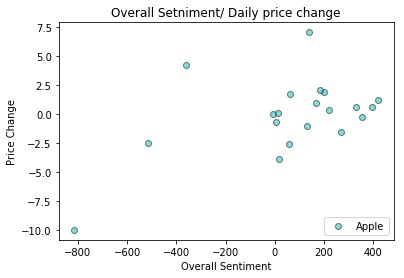

In [224]:
plt.scatter(w1,y1, color="c", alpha= .5, edgecolors = "black", label ="Apple")
# plt.scatter(x2,y2,s=z2, color="orange", alpha= .5, edgecolors = "black", label ="Amazon")
# #plt.scatter(x3,y3,s=z3, color="b", alpha= .5, edgecolors = "black", label ="BoA")
# plt.scatter(x4,y4,s=z4, color="black", alpha= .5, edgecolors = "black", label ="Verizon")
# plt.scatter(x5,y5,s=z5, color="c", alpha= .5, edgecolors = "black", label ="Exxon")
plt.title("Overall Setniment/ Daily price change")
plt.ylabel('Price Change')
plt.xlabel('Overall Sentiment')
plt.savefig("Images/OP.png")

plt.legend(loc=4)
plt.show()
#Are average sentiment and price change correlated

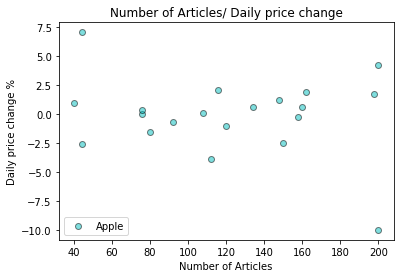

In [212]:
plt.scatter(z1,y1, color="c", alpha= .5, edgecolors = "black", label ="Apple")
# plt.scatter(z2,y2, color="orange", alpha= .5, edgecolors = "black", label ="Amazon")
# #plt.scatter(z3,y3, color="b", alpha= .5, edgecolors = "black", label ="BoA")
# plt.scatter(z4,y4, color="black", alpha= .5, edgecolors = "black", label ="Verizon")
# plt.scatter(z5,y5, color="c", alpha= .5, edgecolors = "black", label ="Exxon")
plt.title("Number of Articles/ Daily price change")
plt.xlabel('Number of Articles')
plt.ylabel('Daily price change %')
plt.savefig("Images/num_articles_price.png")


plt.legend(loc=3)
plt.show()


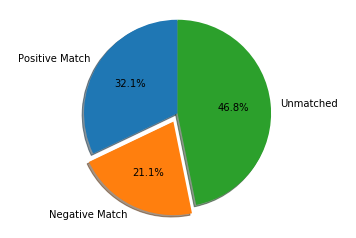

In [210]:
#Apple Price match pie chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive Match', 'Negative Match', "Unmatched"
sizes = [388, 255, 566]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Images/pos_neg_match.png")
plt.show()

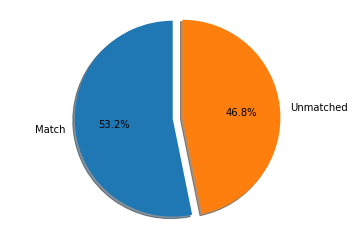

In [215]:
#Apple Price match pie chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Match', "Unmatched"
sizes = [643, 566]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Images/overall_match.png")
plt.show()


In [208]:
apple_bulk_df = pd.read_csv("master_df2.csv").drop(['Unnamed: 0'],axis=1)
apple_bulk_df
plt.savefig("Images/overall_match.png")

<Figure size 432x288 with 0 Axes>

In [228]:
apple_bulk_df

,Date,Company,COD_Price,Avr_sentiment,Sum_sentiment
0,2017-01-23,Apple,0.067,-2.882592,-28.825920
1,2017-01-24,Apple,-0.092,-3.987725,-39.877254
2,2017-01-25,Apple,1.592,-3.238096,-32.380961
3,2017-01-26,Apple,0.049,-10.242322,-102.423221
4,2017-01-27,Apple,0.008,1.701028,10.206169
5,2017-01-30,Apple,-0.262,2.256656,6.769969
6,2017-01-31,Apple,-0.230,-3.731783,-37.317826
7,2017-02-01,Apple,6.098,1.220580,12.205798
8,2017-02-02,Apple,-0.171,2.144597,21.445974
9,2017-02-03,Apple,0.428,1.265258,12.652578


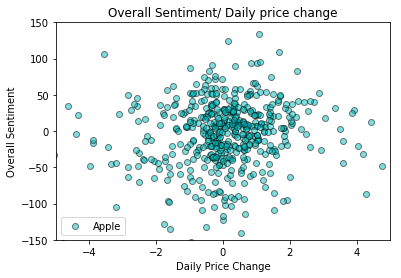

In [227]:
plt.scatter(apple_bulk_df["COD_Price"],apple_bulk_df["Sum_sentiment"], color="c", alpha= .5, edgecolors = "black", label ="Apple")
# plt.scatter(z2,y2, color="orange", alpha= .5, edgecolors = "black", label ="Amazon")
# #plt.scatter(z3,y3, color="b", alpha= .5, edgecolors = "black", label ="BoA")
# plt.scatter(z4,y4, color="black", alpha= .5, edgecolors = "black", label ="Verizon")
# plt.scatter(z5,y5, color="c", alpha= .5, edgecolors = "black", label ="Exxon")
plt.xlim(-5,5)
plt.ylim(-150,150)
plt.title("Overall Sentiment/ Daily price change")
plt.xlabel('Daily Price Change')
plt.ylabel('Overall Sentiment')
plt.savefig("Images/overal_sentiment_price.png")

plt.legend(loc=3)
plt.show()
